Date: 2020-10-25  
Subject: Machine Learning (S2-19_DSECLZG565)  
Assignment: 1  
Group: 179  
  
> Members
> - Sandeep Kumar
> - Shanur Rahman
> - Rahul Bharosh

In [1]:
import numpy as np
import pandas as pd

## Step 1

Convert txt to csv and rename columns 

In [2]:
df = pd.read_csv('data/Skin_NonSkin.txt', sep='\t', header=None)

In [3]:
df

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


In [4]:
df.columns = [ 'b', 'g', 'r', 'class' ]

In [5]:
df

,b,g,r,class
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


In [6]:
df.to_csv('data.csv')

## Step2
Consider all columns as independent variables and assign to variable X except the last column and consider the last column as dependent variable and assign to variable y. Remove columns which don’t help the problem statement

In [23]:
# Independent Variables
_X = df[['b', 'g', 'r']]
X = _X.values


In [24]:
# Dependent Variable
_Y = df[['class']]
Y = _Y.values

In [25]:
X.shape, Y.shape

((245057, 3), (245057, 1))

## Step 2
Compute some basic statistical details like percentile, mean, standard deviation of dataset

### Histogram

array([[<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'g'}>],
       [<AxesSubplot:title={'center':'r'}>, <AxesSubplot:>]], dtype=object)

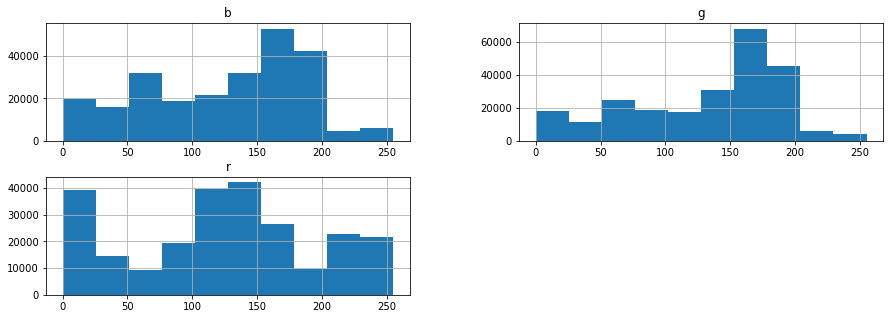

In [45]:
_X.hist(figsize=(15, 5))

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

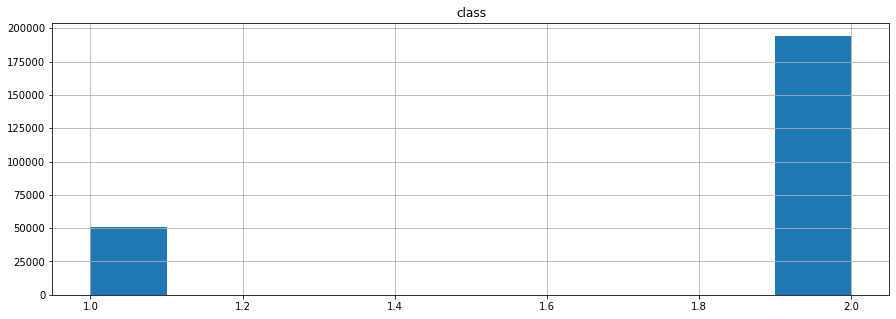

In [46]:
_Y.hist(figsize=(15, 5))

In [47]:
_X.min()

b    0
g    0
r    0
dtype: int64

In [48]:
_X.max()

b    255
g    255
r    255
dtype: int64

In [49]:
_X.mean()

b    125.065446
g    132.507327
r    123.177151
dtype: float64

In [50]:
_X.std()

b    62.255653
g    59.941197
r    72.562165
dtype: float64

In [51]:
# Percentile
for q in range(0, 110, 10):
    print("\n-- q:", q/100, '\n', _X.quantile(q/100))


-- q: 0.0 
 b    0.0
g    0.0
r    0.0
Name: 0.0, dtype: float64

-- q: 0.1 
 b    35.0
g    38.0
r    17.0
Name: 0.1, dtype: float64

-- q: 0.2 
 b    57.0
g    69.0
r    38.0
Name: 0.2, dtype: float64

-- q: 0.3 
 b     84.0
g    102.0
r     91.0
Name: 0.3, dtype: float64

-- q: 0.4 
 b    116.0
g    135.0
r    115.0
Name: 0.4, dtype: float64

-- q: 0.5 
 b    139.0
g    153.0
r    128.0
Name: 0.5, dtype: float64

-- q: 0.6 
 b    158.0
g    164.0
r    136.0
Name: 0.6, dtype: float64

-- q: 0.7 
 b    171.0
g    174.0
r    158.0
Name: 0.7, dtype: float64

-- q: 0.8 
 b    179.0
g    180.0
r    191.0
Name: 0.8, dtype: float64

-- q: 0.9 
 b    197.0
g    195.0
r    227.0
Name: 0.9, dtype: float64

-- q: 1.0 
 b    255.0
g    255.0
r    255.0
Name: 1.0, dtype: float64


## Step 3
Do Feature Scaling on Independent variables

In [60]:
# Min Max Scaling 
#
#  B, g, r: 0-255 --> 0-1
#
#
X = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))

In [63]:
X.min(0)

array([0., 0., 0.])

In [64]:
X.max(0)

array([1., 1., 1.])

In [65]:
X.mean(0)

array([0.49045273, 0.51963658, 0.48304765])

In [66]:
X.std(0)

array([0.24413932, 0.23506304, 0.28455693])

## Step 4
Split the data into train and test dataset

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((196045, 3), (49012, 3), (196045, 1), (49012, 1))

### Explaination
Basically calculate random indexes (0.2*len(X)) between 0 to len(X),

use the indexes to extract the testing set and remaing as training set

- Training Dataset
  
train_idxes = np.random.randint(0, len(X), (round(len(X)*.2),))  
X_train = X[train_idxes]  
Y_train = Y[train_idxes]  

- Test Dataset
  
test_idxes = np.arange(0, len(X))[~np.isin(np.arange(0, len(X)), train_idxes)]  
X_test = X[idxes]  
Y_test = Y[idxes]

## Step 5
Use sklearn library to train on train dataset on random forest and predict on test dataset

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model = RandomForestClassifier()\
        .fit(
            X_train, 
            Y_train.squeeze()
        )

In [96]:
Y_pred = model.predict(X_test)

In [97]:
Y_pred.shape

(49011,)

## Step 6
Compute the accuracy and confusion matrix

In [102]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

In [101]:
confmatrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confmatrix)

Confusion Matrix:
[[10177     2]
 [   39 38793]]


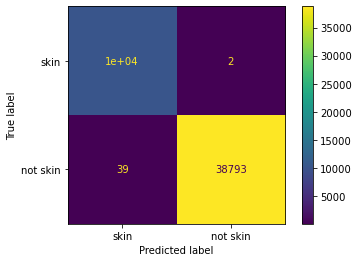

In [106]:
plot_confusion_matrix(model, X_test, Y_test, display_labels=['skin', 'not skin'])

In [109]:
acc = accuracy_score(Y_test,Y_pred)
print("Accuracy:",acc)

Accuracy: 0.9991634531023648
